<h1>Statistical Analysis</h3>

<h2>Load Data</h2>

<h2>Mean Values per Respondent</h2>

In [4]:
import pandas as pd

# Load data
file_path = './datasets/facial_mean_values_per_respondent_less_emotions_9_3_2024_2.csv'
mean_data_from_file = df = pd.read_csv(file_path, low_memory=False)

mean_data_from_file.head()

,Unnamed: 0,Respondent,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Sentimentality,...,Lip Pucker,Lip Stretch,Lip Suck,Lid Tighten,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Blink,Grade
0,0,1,1.163229,0.254944,0.392873,1.440810,6.499545,0.268705,0.674075,1.460056,...,4.920908,1.577789,10.318576,1.194926,0.893259,9.275257,0.482011,2.466853,0.010581,100.0
1,1,2,1.544074,2.332416,0.481205,1.416028,0.570981,0.424949,1.505524,0.719921,...,0.753663,4.551010,7.177666,1.292952,0.257819,0.701962,2.881101,0.724063,0.006212,50.0
2,2,3,1.858315,0.574013,0.342346,2.387849,1.129676,0.135473,3.017969,0.343935,...,1.978853,0.498201,3.241353,0.229480,0.036332,1.667142,1.828333,0.516913,0.002636,55.0
3,3,4,1.167415,2.292135,0.699927,0.777726,3.815992,0.357908,0.299903,1.253224,...,1.463027,9.610665,10.321261,3.834506,0.506664,4.671887,5.000366,2.341052,0.011138,75.0
4,4,5,0.552830,3.125797,0.089759,0.258266,4.016242,1.487197,0.075457,2.939944,...,3.339206,15.879597,11.348795,2.433070,0.728067,6.761394,9.708484,1.967552,0.005759,65.0


In [5]:
mean_data_from_file.columns

Index(['Unnamed: 0', 'Respondent', 'Anger', 'Contempt', 'Disgust', 'Fear',
       'Joy', 'Sadness', 'Surprise', 'Sentimentality', 'Confusion',
       'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler',
       'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Lip Corner Depressor',
       'Lip Press', 'Lip Pucker', 'Lip Stretch', 'Lip Suck', 'Lid Tighten',
       'Nose Wrinkle', 'Smile', 'Smirk', 'Upper Lip Raise', 'Blink', 'Grade'],
      dtype='object')

<h3>Correlation between grade and features</h3>

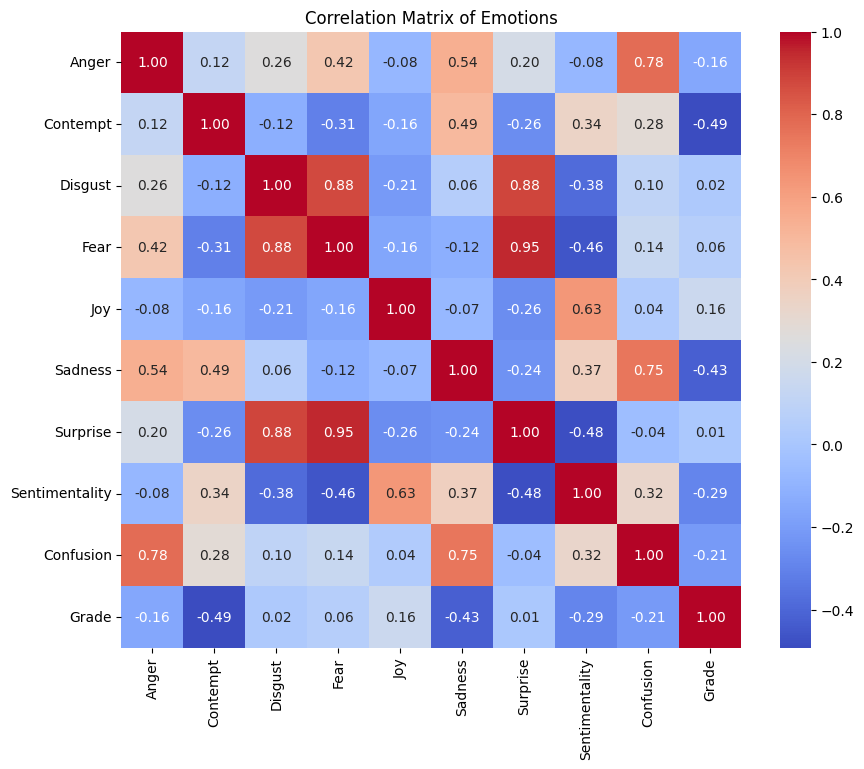

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


selected_columns_df = mean_data_from_file[['Anger', 'Contempt', 'Disgust', 'Fear',
       'Joy', 'Sadness', 'Surprise', 'Sentimentality', 'Confusion','Grade']]

correlation_matrix = selected_columns_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Emotions')
plt.show()


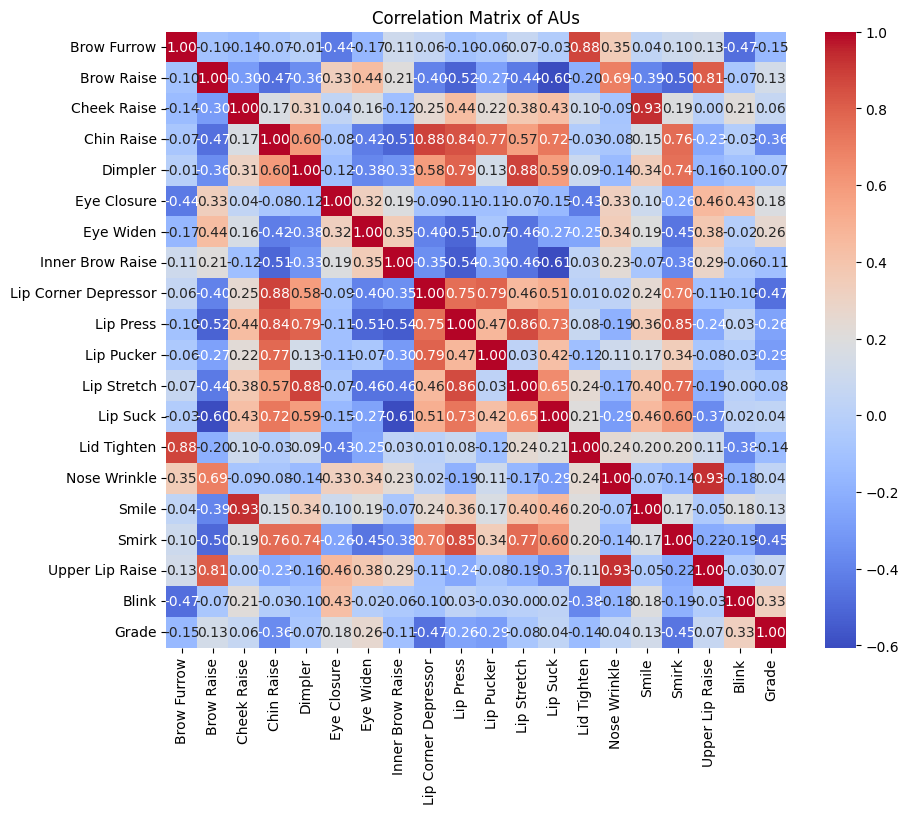

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


selected_columns_df = mean_data_from_file[['Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler',
       'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Lip Corner Depressor',
       'Lip Press', 'Lip Pucker', 'Lip Stretch', 'Lip Suck', 'Lid Tighten',
       'Nose Wrinkle', 'Smile', 'Smirk', 'Upper Lip Raise', 'Blink', 'Grade']]

correlation_matrix = selected_columns_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of AUs')
plt.show()


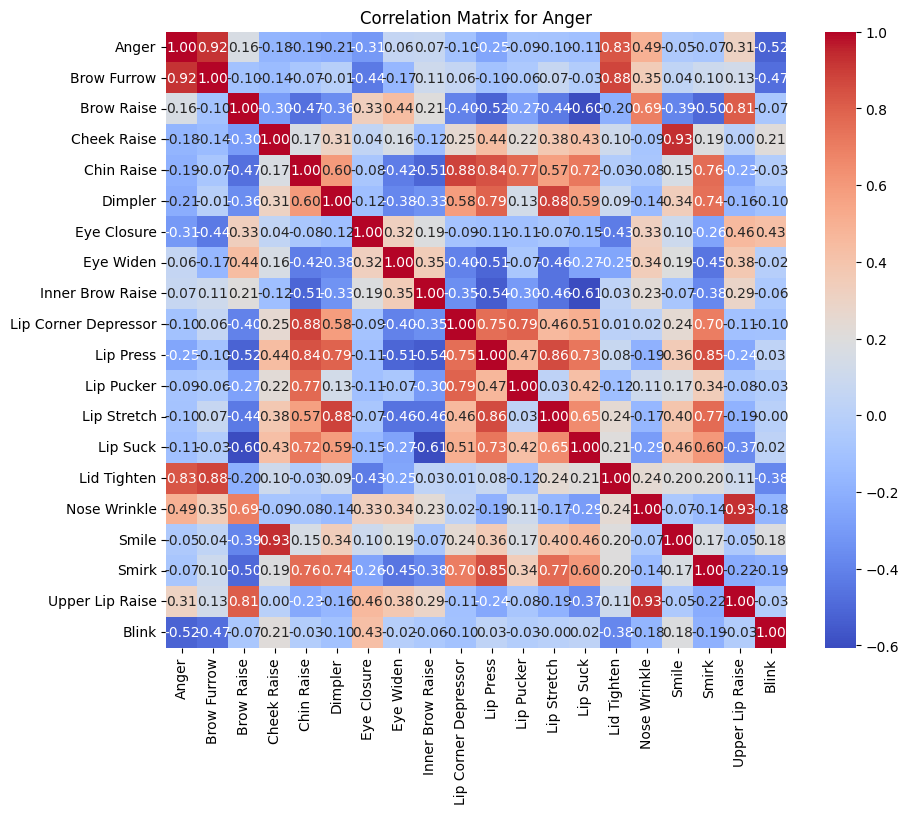

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


selected_columns_df = mean_data_from_file[['Anger','Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler',
       'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Lip Corner Depressor',
       'Lip Press', 'Lip Pucker', 'Lip Stretch', 'Lip Suck', 'Lid Tighten',
       'Nose Wrinkle', 'Smile', 'Smirk', 'Upper Lip Raise', 'Blink']]

correlation_matrix = selected_columns_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Anger')
plt.show()


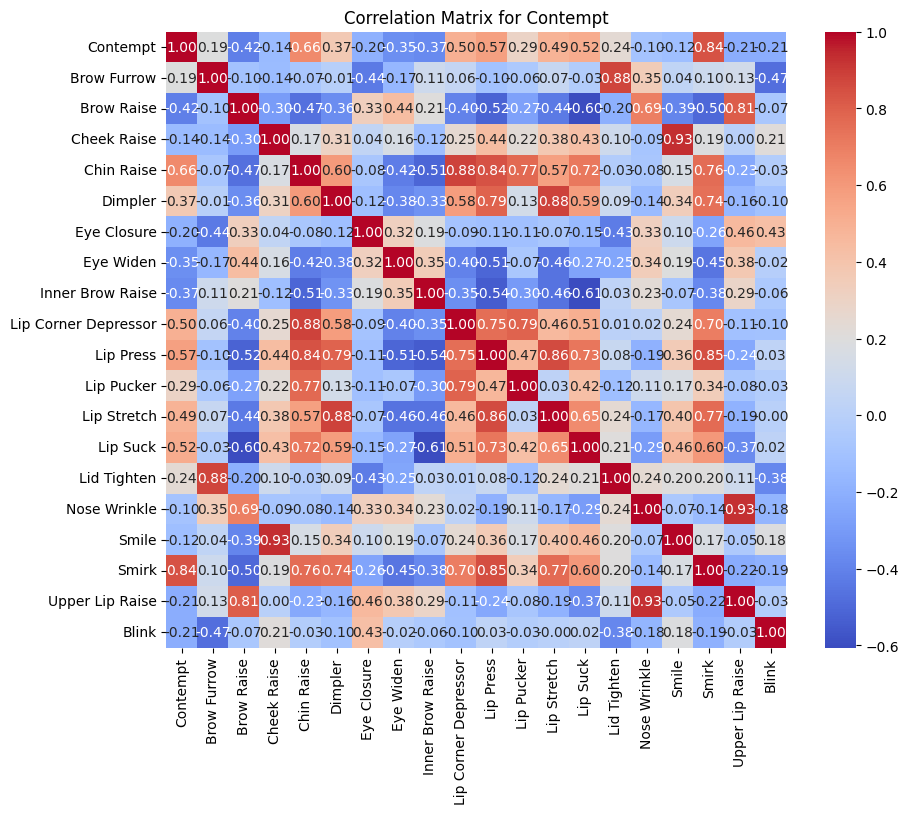

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


selected_columns_df = mean_data_from_file[['Contempt','Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler',
       'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Lip Corner Depressor',
       'Lip Press', 'Lip Pucker', 'Lip Stretch', 'Lip Suck', 'Lid Tighten',
       'Nose Wrinkle', 'Smile', 'Smirk', 'Upper Lip Raise', 'Blink']]

correlation_matrix = selected_columns_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Contempt')
plt.show()


<h2>Linear Regression for Specific Emotions</h2>

In [10]:
# Add 'grade_group' column based on the 'grade' column values
mean_data_from_file['Grade Group'] = mean_data_from_file['Grade'].apply(
    lambda x: 'Below or Equals 55' if x <= 55 else 'Above 55'
)

mean_data_from_file.head()

,Unnamed: 0,Respondent,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Sentimentality,...,Lip Stretch,Lip Suck,Lid Tighten,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Blink,Grade,Grade Group
0,0,1,1.163229,0.254944,0.392873,1.440810,6.499545,0.268705,0.674075,1.460056,...,1.577789,10.318576,1.194926,0.893259,9.275257,0.482011,2.466853,0.010581,100.0,Above 55
1,1,2,1.544074,2.332416,0.481205,1.416028,0.570981,0.424949,1.505524,0.719921,...,4.551010,7.177666,1.292952,0.257819,0.701962,2.881101,0.724063,0.006212,50.0,Below or Equals 55
2,2,3,1.858315,0.574013,0.342346,2.387849,1.129676,0.135473,3.017969,0.343935,...,0.498201,3.241353,0.229480,0.036332,1.667142,1.828333,0.516913,0.002636,55.0,Below or Equals 55
3,3,4,1.167415,2.292135,0.699927,0.777726,3.815992,0.357908,0.299903,1.253224,...,9.610665,10.321261,3.834506,0.506664,4.671887,5.000366,2.341052,0.011138,75.0,Above 55
4,4,5,0.552830,3.125797,0.089759,0.258266,4.016242,1.487197,0.075457,2.939944,...,15.879597,11.348795,2.433070,0.728067,6.761394,9.708484,1.967552,0.005759,65.0,Above 55


In [11]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas as pd

# Assuming mean_data_from_file is your DataFrame and it includes 'Grade Group' as a categorical column
# Convert 'Grade Group' to a binary variable if it's not already
mean_data_from_file['Grade Group Binary'] = mean_data_from_file['Grade Group'].apply(lambda x: 1 if x == 'Above 55' else 0)

X = mean_data_from_file[['Contempt', 'Joy', 'Surprise', 'Confusion']]
y = mean_data_from_file['Grade Group Binary']  # Use the binary version of 'Grade Group'

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a logistic regression model
model = sm.Logit(y_train, X_train)

# Fitting the model
results = model.fit()

# Printing the summary
print(results.summary())


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:     Grade Group Binary   No. Observations:                   12
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            4
Date:                Sun, 17 Mar 2024   Pseudo R-squ.:                   1.000
Time:                        16:33:16   Log-Likelihood:            -3.4803e-07
converged:                      False   LL-Null:                       -8.1503
Covariance Type:            nonrobust   LLR p-value:                  0.002641
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.5788   9918.157      0.009      0.993   -1.93e+04    1.95e+04
Contempt      13.5849   2660.499      0.005      0.996   -5200.89

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detect

<h2>Statistical Describe</h2>

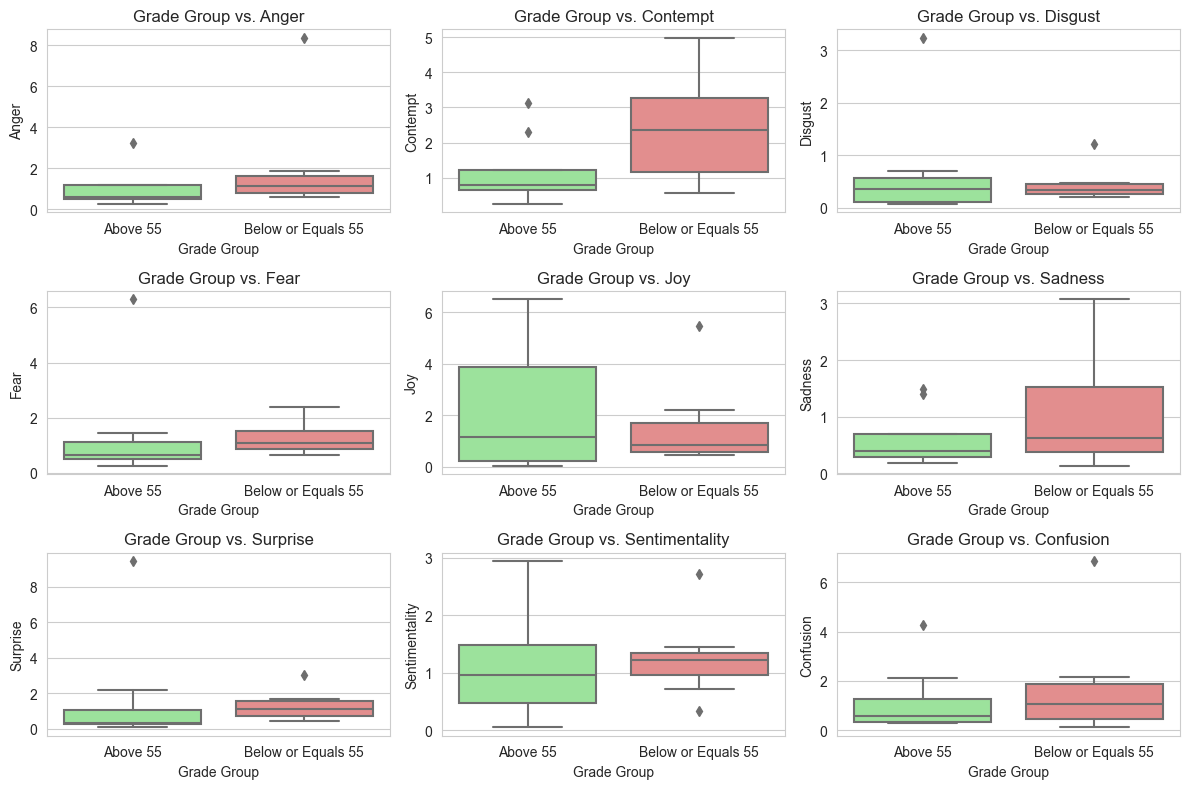

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the aesthetic style of the plots
sns.set_style("whitegrid")
sns.set_palette("deep") 

# Create a figure and a set of subplots
plt.figure(figsize=(12, 8))

# List of emotions you want to plot
emotions = ['Anger', 'Contempt', 'Disgust', 'Fear',
       'Joy', 'Sadness', 'Surprise', 'Sentimentality', 'Confusion']

palette = {"Below or Equals 55": "lightcoral", "Above 55": "lightgreen"}

for i, emotion in enumerate(emotions, 1):
    plt.subplot(3, 3, i)  # Creates a grid of 2x2 and fills position i
    sns.boxplot(x='Grade Group', y=emotion, data=mean_data_from_file, palette=palette)
    plt.title(f'Grade Group vs. {emotion}')

plt.tight_layout()
plt.show()


<h5>
A box plot (or box-and-whisker plot) is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed. Here’s how to interpret a box plot:

Components of a Box Plot:
Central Box: The box spans from the first quartile (Q1) to the third quartile (Q3). This region, known as the interquartile range (IQR), contains the middle 50% of the data. The length of the box indicates the degree of spread in the middle half of the data; a longer box means a larger spread.

Median (Middle Line): A line within the box marks the median (Q2) of the dataset, dividing the box into two parts. The median represents the middle value when the data are sorted.

Whiskers: Lines extending from the box (the "whiskers") indicate variability outside the upper and lower quartiles, hence they cover the total spread of the data. The ends of the whiskers represent the minimum and maximum values within 1.5 times the IQR from the Q1 and Q3, respectively.

Outliers: Data points beyond the whiskers are often plotted individually as small dots. These points are considered outliers since they lie beyond 1.5 times the IQR from the quartiles. 

<h3>Describe AUs</h3>

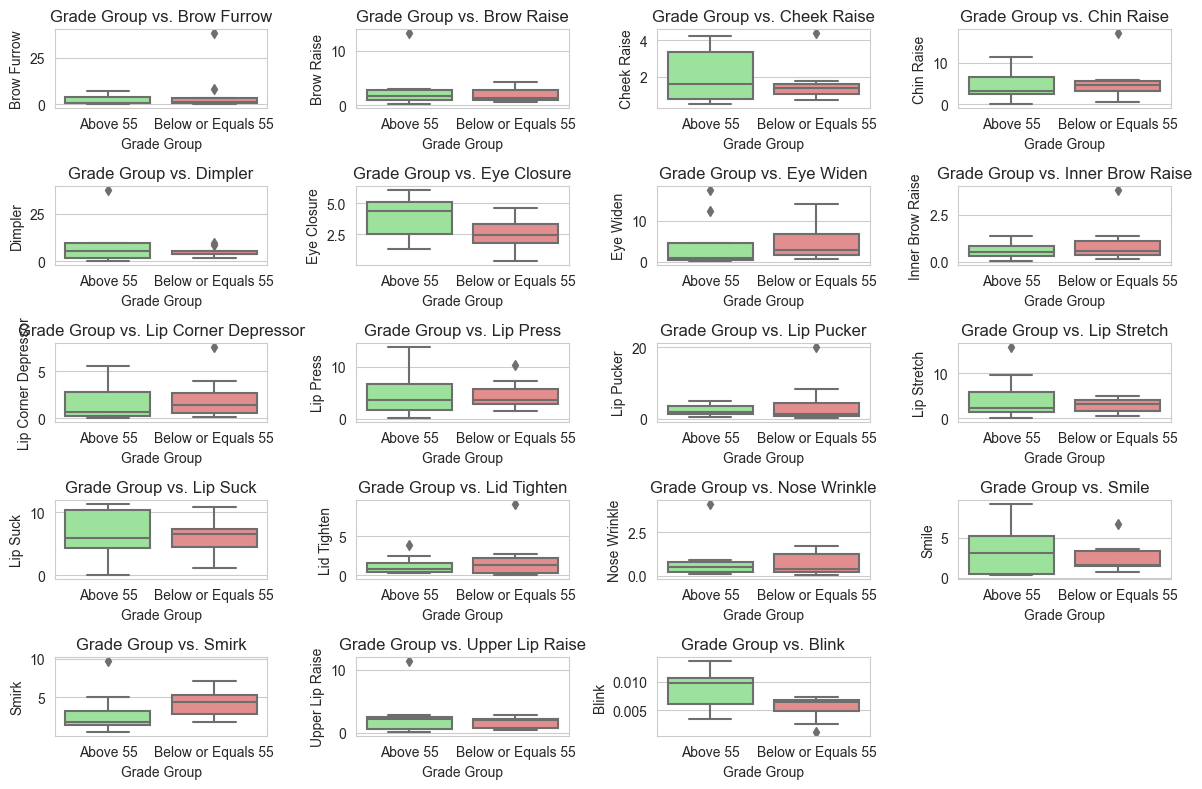

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the aesthetic style of the plots
sns.set_style("whitegrid")
sns.set_palette("deep") 

# Create a figure and a set of subplots
plt.figure(figsize=(12, 8))

# List of emotions you want to plot
emotions = ['Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler',
       'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Lip Corner Depressor',
       'Lip Press', 'Lip Pucker', 'Lip Stretch', 'Lip Suck', 'Lid Tighten',
       'Nose Wrinkle', 'Smile', 'Smirk', 'Upper Lip Raise', 'Blink']

palette = {"Below or Equals 55": "lightcoral", "Above 55": "lightgreen"}

for i, emotion in enumerate(emotions, 1):
    plt.subplot(5, 4, i)  # Creates a grid of 2x2 and fills position i
    sns.boxplot(x='Grade Group', y=emotion, data=mean_data_from_file, palette=palette)
    plt.title(f'Grade Group vs. {emotion}')

plt.tight_layout()
plt.show()


<h2>Statistical Significancy Test</h2>

<h4>Normal Distribution Test</h4>

In [14]:
from scipy import stats
import pandas as pd


# Selected columns for the Shapiro-Wilk test
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear',
       'Joy', 'Sadness', 'Surprise', 'Sentimentality', 'Confusion']

# Perform Shapiro-Wilk test for each selected column
shapiro_results = {}
for column in selected_columns:
    stat, p = stats.shapiro(mean_data_from_file[column])
    shapiro_results[column] = {'Statistics': stat, 'p-value': p}

shapiro_results


{'Anger': {'Statistics': 0.5696579813957214, 'p-value': 8.489801075484138e-06},
 'Contempt': {'Statistics': 0.8805922269821167,
  'p-value': 0.039638228714466095},
 'Disgust': {'Statistics': 0.568387508392334,
  'p-value': 8.268239071185235e-06},
 'Fear': {'Statistics': 0.6191895604133606, 'p-value': 2.470169602020178e-05},
 'Joy': {'Statistics': 0.8128445148468018, 'p-value': 0.00405450165271759},
 'Sadness': {'Statistics': 0.7381331920623779,
  'p-value': 0.00045877197408117354},
 'Surprise': {'Statistics': 0.5727514028549194,
  'p-value': 9.056157068698667e-06},
 'Sentimentality': {'Statistics': 0.9110309481620789,
  'p-value': 0.1209113597869873},
 'Confusion': {'Statistics': 0.7198736071586609,
  'p-value': 0.000281811022432521}}

<h5>According to the Shapiro-Wilk test results, all emotions except for Sentimentality, are not normally distributed. Therefore, the Mann-Whitney U Test (also known as the Wilcoxon Rank-Sum Test) will be used to compare the 2 grade groups.

In [15]:
from scipy.stats import mannwhitneyu

# Function to perform Mann-Whitney U test on specified columns for two grade groups
def perform_mannwhitneyu_test(dataframe, grade_group_column, grade_group1, grade_group2, columns_to_compare):
    results = {}
    for column in columns_to_compare:
        # Splitting the data into two groups based on the grade group
        group1 = dataframe[dataframe[grade_group_column] == grade_group1][column]
        group2 = dataframe[dataframe[grade_group_column] == grade_group2][column]

        # Performing the Mann-Whitney U test
        u_stat, p_value = mannwhitneyu(group1, group2)
        
        # Storing the results
        results[column] = {'U statistic': u_stat, 'P-value': p_value}
    
    return results


columns_to_compare = ['Anger', 'Contempt', 'Disgust', 'Fear',
       'Joy', 'Sadness', 'Surprise', 'Confusion']
test_results = perform_mannwhitneyu_test(mean_data_from_file, 'Grade Group', 'Below or Equals 55', 'Above 55', columns_to_compare)

# Printing the test results
for column, result in test_results.items():
    print(f"{column}: U statistic = {result['U statistic']}, P-value = {result['P-value']}")



Anger: U statistic = 47.0, P-value = 0.13038073038073036
Contempt: U statistic = 51.0, P-value = 0.04988344988344988
Disgust: U statistic = 33.0, P-value = 0.959129759129759
Fear: U statistic = 44.0, P-value = 0.23449883449883446
Joy: U statistic = 36.0, P-value = 0.7209013209013208
Sadness: U statistic = 39.0, P-value = 0.5053613053613053
Surprise: U statistic = 47.0, P-value = 0.13038073038073036
Confusion: U statistic = 36.0, P-value = 0.7209013209013208


<h3>Classifiers</h3>

In [70]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np


# Separating features and target variable
X = mean_data_from_file.drop(['Grade Group', 'Grade Group Binary', 'Grade', 'Respondent', 'Unnamed: 0'], axis=1)  
y = mean_data_from_file['Grade Group'] 

# Splitting the dataset into the Training set and Hold-out Validation set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42) 

# Creating a logistic regression model pipeline with standard scaling
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Applying cross-validation on the Training set
scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {np.mean(scores)}')

# Training the model on the entire Training set
model.fit(X_train, y_train)

# Predicting the Hold-out Validation set results
y_pred = model.predict(X_validation)

# Calculating the accuracy on the Hold-out Validation set
accuracy = accuracy_score(y_validation, y_pred)
print(f'Hold-out validation accuracy: {accuracy}')


Cross-validation scores: [0.33333333 0.66666667 1.         1.         0.        ]
Mean cross-validation score: 0.6
Hold-out validation accuracy: 0.5


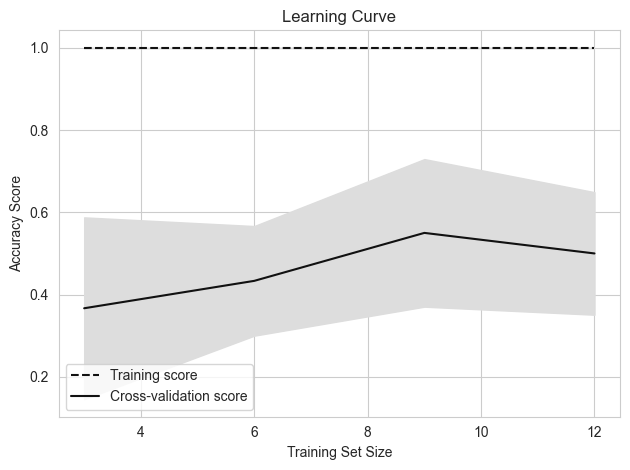

(None, None)

In [71]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that includes scaling and logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression())

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands (Standard Deviation)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(), plt.show()


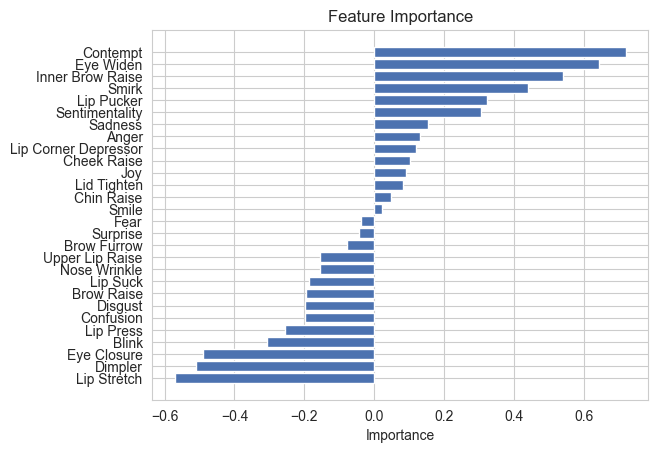

In [72]:

model.fit(X_train, y_train)  

# Access the logistic regression instance from the pipeline (assuming it's the last step)
logreg = model.named_steps['logisticregression']

# Get feature names
feature_names = X.columns

# Get and display feature importances
importance = logreg.coef_[0]

# Sort features by importance
sorted_idx = np.argsort(importance)

plt.title('Feature Importance')
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.show()


In [73]:
X.columns

Index(['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Sentimentality', 'Confusion', 'Brow Furrow', 'Brow Raise',
       'Cheek Raise', 'Chin Raise', 'Dimpler', 'Eye Closure', 'Eye Widen',
       'Inner Brow Raise', 'Lip Corner Depressor', 'Lip Press', 'Lip Pucker',
       'Lip Stretch', 'Lip Suck', 'Lid Tighten', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Blink'],
      dtype='object')

<h4>Classifier after feature importance</h4>

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np


# Separating features and target variable
X_filltered = X[['Contempt','Eye Widen', 'Inner Brow Raise', 'Lip Pucker', 'Sentimentality',
                 'Lip Stretch', 'Dimpler', 'Eye Closure']]
y = mean_data_from_file['Grade Group'] 

# Splitting the dataset into the Training set and Hold-out Validation set
X_train, X_validation, y_train, y_validation = train_test_split(X_filltered, y, test_size=0.3, random_state=42) 

# Creating a logistic regression model pipeline with standard scaling
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Applying cross-validation on the Training set
scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {np.mean(scores)}')

# Training the model on the entire Training set
model.fit(X_train, y_train)

# Predicting the Hold-out Validation set results
y_pred = model.predict(X_validation)

# Calculating the accuracy on the Hold-out Validation set
accuracy = accuracy_score(y_validation, y_pred)
print(f'Hold-out validation accuracy: {accuracy}')


Cross-validation scores: [0.66666667 0.         1.         1.         1.        ]
Mean cross-validation score: 0.7333333333333333
Hold-out validation accuracy: 0.8


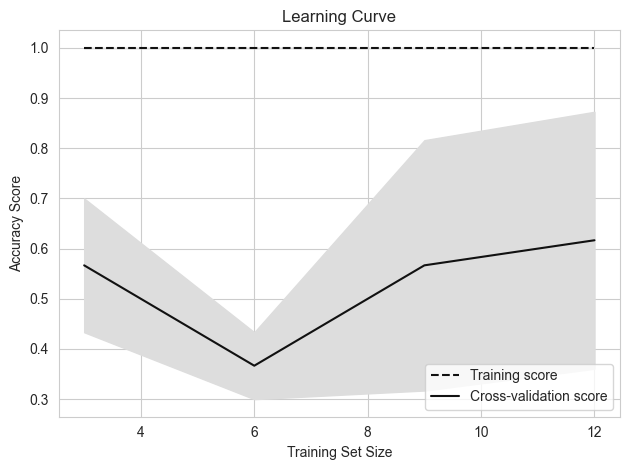

(None, None)

In [77]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that includes scaling and logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression())

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_filltered, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands (Standard Deviation)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(), plt.show()


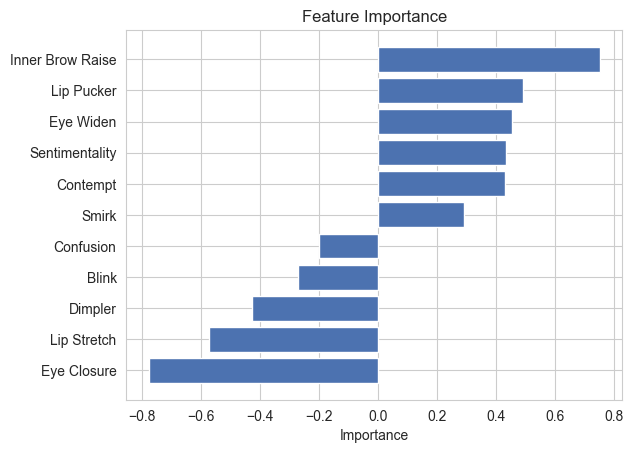

In [79]:

model.fit(X_train, y_train)  

# Access the logistic regression instance from the pipeline (assuming it's the last step)
logreg = model.named_steps['logisticregression']

# Get feature names
feature_names = X_filltered.columns

# Get and display feature importances
importance = logreg.coef_[0]

# Sort features by importance
sorted_idx = np.argsort(importance)

plt.title('Feature Importance')
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.show()
